<a href="https://colab.research.google.com/github/victorncg/aulas_palestras/blob/main/20220324_Webscraping_Python_Insper_Jr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---
# **Webscraping**
---

# 1. Bibliotecas utilizadas

In [1]:
# Algumas das bibliotecas fundamentais nas técnicas de Webscraping e Webcrawling
# Bibliotecas opcionais e pouco representativas (ex., biblioteca para mudar o diretório de trabalho) estão dispostas ao longo do código
# A instalação é necessária apenas na primeira vez de uso

!pip install requests
!pip install bs4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 2. Entendendo um código HTML

## 2.1. Código HTML bruto *vs* Aparência HTML

HTML é basicamente uma linguagem de marcação, onde cada **tag** (ex., \<html>...<\\html>) representa algo dentro da hierarquia da página. Neste caso, **\<html>** indica o início de um conteúdo html e **<\\html>** indica o fim deste conteúdo. Dentro desta tag temos outras tags, cada uma referente a determinada estrutura do HTML. Veja abaixo um código HTML bruto e logo abaixo como está sua "aparência"

    ------------------------------------------------------------------------------------------
    <!DOCTYPE html>
    <html>
        <head>
            <title>Page Title</title>
            <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
        </head>

        <body>
    
            <div>
                <h1>Isto é um título</h1>
                <p>Isto é um parágrafo</p>
                <a href='https://www.google.com.br'>Link do google</a>
            </div>

            <div>
                <h2>Lista não ordenada</h2>

                <ul>
                    <li>Café</li>
                    <li>Chá</li>
                    <li>Leite</li>
                </ul>  

                <h2>Lista ordenada</h2>

                <ol>
                    <li>Café</li>
                    <li>Chá</li>
                    <li>Leite</li>
                </ol>  
            </div>

            <div>
                <h2>Exemplo de uma tabela</h2>

                <table>
                    <tr>
                        <th>Nome</th>
                        <th>Sobrenome</th>
                        <th>Idade</th>
                    </tr>
                    <tr>
                        <td>Jill</td>
                        <td>Smith</td>
                        <td>50</td>
                    </tr>
                    <tr>
                        <td>Eve</td>
                        <td>Jackson</td>
                        <td>94</td>
                    </tr>
                </table> 
            </div>
        
        </body>
    </html>
    ------------------------------------------------------------------------------------------

Para visualizar o HTML estruturado deverá exportar o código como HTML
Alguns sites permitem essa visualização. Ex: https://pt.infobyip.com/htmlandjavascripteditor.php

Principais **tags** e suas descrições simplificadas
* h1: Indica o título da página ou da sessão em que ela está contida. Podemos também usar h2, h3... para indicar subtítulos.
* div: Serve para organizar e dividir partes do código
* span: Serve para organizar os elementos de uma mesma linha
* p: Indica um parágrafo
* a: Indica um link, onde o link vem representado por 'href' dentro da tag
* ul: Indica listas não ordenadas
* ol: Indica listas ordenadas
* li: Indica os elementos da lista 'ul' ou 'ol'
* table: Indica uma tabela
* tr: Indica o começo de uma linha em 'table'
* th: Indica o head em 'table'
* td: Indica uma linha em 'table'


## 2.2. Inspecionando o código desenvolvido em cada site

Por mais que os desenvolvedores web em HTML tentem seguir regras de estruturação na criação das páginas, é impossível que todas estejam no mesmo padrão. Por exemplo, uma notícia no **InfoMoney** pode ser formatada em um padrão diferente de uma notícia no **Bloomberg** ou no **Investing**. Por isso, devemos entender como cada página está estruturada antes de começar a extrair qualquer informação dela. Nessas etapas recomendamos o uso do Google Chrome, devido à sua facilidade em mostrar de forma intuitiva o código fonte no ***Ambiente de desenvolvedor - DevTools***

Para navegar no Ambiente de Desenvolvedor entre em um site e aperte F12. Depois selecione o botão 'Inspect' (canto esquerdo superior, Ctrl+Shift+C)<p>
https://www.infomoney.com.br/

In [3]:
# Comando para importar um html. O output será gigante pois contem todo o código da página
# Importamos nossa url objeto de webscraping usando a biblioteca requests
# A variável criada "html_fonte" é um objeto da classe requests.

html_fonte = requests.get("https://www.infomoney.com.br")
html_fonte

<Response [200]>

In [4]:
# Usando o método '.text' transformamos a variável 'html_fonte' em uma string. Para evitar sobrecarregar o output, vamos imprimir apenas alguns caracteres
# Basta retirar o indexador caso queira visualizar todo o código html da pagina importada
# Por curiosidade, vamos imprimir antes de tudo o número de caracteres do html

html_text = html_fonte.text
print("Este html importado possui",len(html_text),"caracteres")
html_text[0:5000]

Este html importado possui 281360 caracteres


'<!doctype html>\n<html lang="pt-BR">\n<head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n    \n    <style>\n        @charset "UTF-8";:root{--sapphire:#0091FF;--apatite:#32C5FF;--ruby:#FF5252;--xpamber:#F7B500;--gray:#6c757d;--amazonite:#44D7B6;--lightgray:#F5F7F8;--darkgray:#212121;--gray:#6C757D;--gray24:rgba(108, 117, 125, 0.24);--blue:#0091FF;--lightblue:#32C5FF;--yellow:#ffc709;--red:#FF5252;--emerald:#1eb980;--white:#ffffff}*{letter-spacing:normal!important}html{scroll-behavior:smooth}body{font-family:"Helvetica Neue","Helvetica Neue LT Pro",Helvetica,Arial,sans-serif;color:#000}a{color:var(--sapphire)}h1{letter-spacing:-.02em!important}p{font-weight:400!important}.hl-hat{display:block;font-size:.875rem;font-weight:400!important;line-height:16px;margin-bottom:4px;color:#666;width:100%}.hl-title{display:block}.hl-title a{color:#000}.hl-title-2{font-size:24px;line-height:28px;letter-spacing:-.01em!importan

In [5]:
type(html_text)

str

Da forma como está carregado (como uma grande string) é praticamente impossível trabalhar com o código (muito diferente de quando inspecionamos no Google Chrome através do DevTools. Nesse ponto, o uso da biblioteca ***bs4 (BeautifulSoup)*** vem auxiliar na organização e abstração de toda a string criada a partir do código HTML, de forma a facilitar o uso no python

In [6]:
# Organizar o html_fonte html.parser"</b> como parâmetros da função <b>BeautifulSoup</b>, conseguimos organizar nosso código HTML:</p>

html = BeautifulSoup(html_text, "html.parser")

In [7]:
# O output é muito grande (caso queira visualizar, basta retirar o # antes de html)

# html

In [8]:
# Nesse momento, o python (através da bs4) já consegue entender o código html para buscarmos os dados que queremos (principalmente baseado nas tags)
# Antes sempre devemos inspecionar o Ambiente de Desenvolvedor no próprio site (F12)
# Como exemplo, vamos buscar as manchetes que estão nesse momento no quadro principal do site do InfoMoney? https://www.infomoney.com.br/

manchetes = html.findAll(attrs = {'class': 'hl-title hl-title-8'})
manchetes

[<span class="hl-title hl-title-8">
 <i class="material-icons">arrow_forward</i> <a href="https://www.infomoney.com.br/mercados/itausa-itsa4-votorantim-oferta-andrade-gutierrez-ccr-ccro3/" title="Itaúsa e Votorantim oferecem R$ 4,1 bi à Andrade Gutierrez por 14% da CCR">Itaúsa e Votorantim oferecem R$ 4,1 bi à Andrade Gutierrez por 14% da CCR</a>
 </span>, <span class="hl-title hl-title-8">
 <i class="material-icons">arrow_forward</i> <a href="https://www.infomoney.com.br/mercados/locaweb-lwsa3-balanco-quarto-trimestre-2021/" title="Locaweb reverte lucro em prejuízo de R$ 7,2 mi; aquisições pesam no resultado">Locaweb reverte lucro em prejuízo de R$ 7,2 mi; aquisições pesam no resultado</a>
 </span>, <span class="hl-title hl-title-8">
 <i class="material-icons">arrow_forward</i> <a href="https://lp.infomoney.com.br/serie-renda-extra-imobiliaria-202203-transmissao-ep1-d" title="Especialista da XP mostra passo a passo para viver de renda com FIIs">Especialista da XP mostra passo a passo 

In [9]:
# Podemos ver quantas manchetes temos

len(manchetes)

3

In [10]:
# Utilizando uma estrutura de repetição podemos extrair apenas os textos em uma lista

lista_manchetes = []

for i in range(0,len(manchetes)):
    manchete_title = manchetes[i].text
    lista_manchetes.append(manchete_title)

In [11]:
# Note que nesse caso o text não conseguiu eliminar todos os caracteres "indesejados" para deixar apenas o texto da notícia

lista_manchetes

['\narrow_forward Itaúsa e Votorantim oferecem R$ 4,1 bi à Andrade Gutierrez por 14% da CCR\n',
 '\narrow_forward Locaweb reverte lucro em prejuízo de R$ 7,2 mi; aquisições pesam no resultado\n',
 '\narrow_forward Especialista da XP mostra passo a passo para viver de renda com FIIs\n']

In [12]:
# Podemos fazer os ajustes finais e recriar o 'for' que fizemos logo acima, incluindo o método 'replace' (no exemplo usaremos duas vezes)
# Existem formas mais elegantes de sintaxe para essas substituições múltiplas (ex., usando dicionários), mas por enquanto ficaremos com esse método mais simples

lista_manchetes_final = []

for i in range(0,len(manchetes)):
    manchete_title = manchetes[i].text
    manchete_title_final = manchete_title.replace('\narrow_forward ','').replace('\n','')
    lista_manchetes_final.append(manchete_title_final)

In [13]:
# Lista indexada com as manchestes

lista_manchetes_final

['Itaúsa e Votorantim oferecem R$ 4,1 bi à Andrade Gutierrez por 14% da CCR',
 'Locaweb reverte lucro em prejuízo de R$ 7,2 mi; aquisições pesam no resultado',
 'Especialista da XP mostra passo a passo para viver de renda com FIIs']

In [14]:
# Acesso por indexação Python

lista_manchetes_final[0]

'Itaúsa e Votorantim oferecem R$ 4,1 bi à Andrade Gutierrez por 14% da CCR'

# 3. Caso 1 - Webscraping com Rendimentos de Fundos Imobiliários (FIIs)

Funds Explorer - muito legal para obtenção de dados de FIIs <p>
Dados de mais @ FIIs, distribuídos em 9 setores e 24 colunas de atributos <p>
https://www.fundsexplorer.com.br/ranking

In [15]:
# Importamos nossa url objeto de webscraping usando a biblioteca requests

FII_url = requests.get("https://www.fundsexplorer.com.br/ranking")
FII_url

<Response [200]>

In [16]:
# Transformar o código em texto
# Output reduzido

FII_url.text[0:1000]

'<!DOCTYPE html>\n<html lang="pt-br">\n\n<head>\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":3,"applicationTime":13,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(a

In [19]:
# Analisar o arquivo com a BeutifulSoup (HTML parsing)

FII_bs4 = BeautifulSoup(FII_url.text, "html.parser")
FII_bs4.head()

[<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":3,"applicationTime":13,"agent":""}</script>,
 <script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(arguments)),n?null:this,r),n?void 0:this}}var o=

In [20]:
# Extração da tabela. Antes devemos inspecionar o Ambiente de Desenvolvedor no próprio site (F12)

FII_table = FII_bs4.findAll(attrs = {'id': 'scroll-wrapper'})
table = FII_table[0].findAll('table')

In [21]:
# Output gigante, mas vemos que é um objeto Result Set de bs4

type(table)

bs4.element.ResultSet

In [50]:
# Transformar o <table>...</table> em um Pandas DataFrame
# Vamos substituir o separador de casas decimais (na página estão como vírgula) por '.' 

FII_df = pd.read_html(str(FII_table[0]))[0]

In [51]:
FII_df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,26",8285.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.746.443,59","R$ 6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 432.904.709,37","R$ 10,82",136.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,23",1897.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.391.929,40","R$ 13,94",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 896,00",8.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 250.487.663,18","R$ 2.253,05",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,83",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -8.707.885,16","R$ -11,48",-68.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,VJFD11,Híbrido,NaN,NaN,"R$ 0,86","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 650.064.545,92","R$ 133,32",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
273,WTSP11B,Híbrido,"R$ 40,10",10.0,"R$ 0,48","1,01%","2,53%","4,46%","6,33%","0,84%",...,"R$ 77.799.824,27","R$ 78,38",51.0,"0,40%","3,55%","3,97%","3,97%",NaN,NaN,0
274,BTRA11,Outros,"R$ 100,37",6278.0,"R$ 0,90","0,92%","2,81%","4,99%","0,00%","0,94%",...,"R$ 347.617.328,85","R$ 103,32",97.0,NaN,NaN,NaN,NaN,NaN,NaN,0
275,EDGA11,Lajes Corporativas,"R$ 19,58",4402.0,"R$ 0,11","0,49%","1,29%","2,71%","6,04%","0,43%",...,"R$ 252.515.454,02","R$ 66,24",30.0,"0,16%","0,00%","0,16%","0,16%","48,81%",NaN,1


In [52]:
FII_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [53]:
FII_df.dtypes

Códigodo fundo              object
Setor                       object
Preço Atual                 object
Liquidez Diária            float64
Dividendo                   object
DividendYield               object
DY (3M)Acumulado            object
DY (6M)Acumulado            object
DY (12M)Acumulado           object
DY (3M)Média                object
DY (6M)Média                object
DY (12M)Média               object
DY Ano                      object
Variação Preço              object
Rentab.Período              object
Rentab.Acumulada            object
PatrimônioLíq.              object
VPA                         object
P/VPA                      float64
DYPatrimonial               object
VariaçãoPatrimonial         object
Rentab. Patr.no Período     object
Rentab. Patr.Acumulada      object
VacânciaFísica              object
VacânciaFinanceira          object
QuantidadeAtivos             int64
dtype: object

In [54]:
# Note que temos problemas para reconhecer os valores de algumas colunas (ex., preço atual) como números

FII_df['Preço Atual']

0        R$ 2,26
1       R$ 14,70
2        R$ 6,23
3      R$ 896,00
4        R$ 7,83
         ...    
272          NaN
273     R$ 40,10
274    R$ 100,37
275     R$ 19,58
276     R$ 28,45
Name: Preço Atual, Length: 277, dtype: object

In [55]:
# Vamos substituir o "R$ " por "vazio"

FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace('.','').str.replace(',','.').replace(to_replace=r'^R\$ ', value='',regex=True).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
# Outro problema é o separador decimal (atualmente como vírgula). Entretanto, não podemos simplesmente substituir por '.' diretamente pois podem existir valores com '.' como separador de milhar
# Nessa caso, melhor fazer em duas etapas

FII_df['Preço Atual']

0        2.26
1       14.70
2        6.23
3      896.00
4        7.83
        ...  
272       NaN
273     40.10
274    100.37
275     19.58
276     28.45
Name: Preço Atual, Length: 277, dtype: float64

In [57]:
type(FII_df)

pandas.core.frame.DataFrame

In [58]:
FII_df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.26,8285.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.746.443,59","R$ 6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 432.904.709,37","R$ 10,82",136.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.23,1897.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.391.929,40","R$ 13,94",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,896.00,8.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 250.487.663,18","R$ 2.253,05",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,7.83,1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -8.707.885,16","R$ -11,48",-68.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,VJFD11,Híbrido,NaN,NaN,"R$ 0,86","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 650.064.545,92","R$ 133,32",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
273,WTSP11B,Híbrido,40.10,10.0,"R$ 0,48","1,01%","2,53%","4,46%","6,33%","0,84%",...,"R$ 77.799.824,27","R$ 78,38",51.0,"0,40%","3,55%","3,97%","3,97%",NaN,NaN,0
274,BTRA11,Outros,100.37,6278.0,"R$ 0,90","0,92%","2,81%","4,99%","0,00%","0,94%",...,"R$ 347.617.328,85","R$ 103,32",97.0,NaN,NaN,NaN,NaN,NaN,NaN,0
275,EDGA11,Lajes Corporativas,19.58,4402.0,"R$ 0,11","0,49%","1,29%","2,71%","6,04%","0,43%",...,"R$ 252.515.454,02","R$ 66,24",30.0,"0,16%","0,00%","0,16%","0,16%","48,81%",NaN,1


In [59]:
FII_df.dtypes

Códigodo fundo              object
Setor                       object
Preço Atual                float64
Liquidez Diária            float64
Dividendo                   object
DividendYield               object
DY (3M)Acumulado            object
DY (6M)Acumulado            object
DY (12M)Acumulado           object
DY (3M)Média                object
DY (6M)Média                object
DY (12M)Média               object
DY Ano                      object
Variação Preço              object
Rentab.Período              object
Rentab.Acumulada            object
PatrimônioLíq.              object
VPA                         object
P/VPA                      float64
DYPatrimonial               object
VariaçãoPatrimonial         object
Rentab. Patr.no Período     object
Rentab. Patr.Acumulada      object
VacânciaFísica              object
VacânciaFinanceira          object
QuantidadeAtivos             int64
dtype: object

In [60]:
# Análises simples como valor máximo são possíveis agora nesta coluna

max(FII_df['Preço Atual'])

76000.0

In [61]:
# Agora faremos o mesmo para a coluna "DY (12M)Acumulado" (dividend yield acumulado nos últimos 12 meses)

FII_df['DY (12M)Acumulado']

0      0,00%
1      0,00%
2      0,00%
3      0,00%
4      0,00%
       ...  
272    0,00%
273    6,33%
274    0,00%
275    6,04%
276    5,12%
Name: DY (12M)Acumulado, Length: 277, dtype: object

In [62]:
# Substituir '%' por 'vazio' e ',' por '.'

FII_df['DY (12M)Acumulado'] = FII_df['DY (12M)Acumulado'].str.replace('%','')
FII_df['DY (12M)Acumulado'] = FII_df['DY (12M)Acumulado'].str.replace(',','.').astype(float)
max(FII_df['DY (12M)Acumulado'])

21.8

In [63]:
# Remover os NAs antes de análises exploratórias

FII_df.dropna(subset = ['Preço Atual','DY (12M)Acumulado','Setor'], inplace=True)
FII_df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.26,8285.0,"R$ 0,00","0,00%","0,00%","0,00%",0.00,"0,00%",...,"R$ 65.746.443,59","R$ 6,98",32.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,"R$ 0,00","0,00%","0,00%","0,00%",0.00,"0,00%",...,"R$ 432.904.709,37","R$ 10,82",136.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.23,1897.0,"R$ 0,00","0,00%","0,00%","0,00%",0.00,"0,00%",...,"R$ 27.391.929,40","R$ 13,94",45.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,896.00,8.0,"R$ 0,00","0,00%","0,00%","0,00%",0.00,"0,00%",...,"R$ 250.487.663,18","R$ 2.253,05",40.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,7.83,1.0,"R$ 0,00","0,00%","0,00%","0,00%",0.00,"0,00%",...,"R$ -8.707.885,16","R$ -11,48",-68.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,CNES11,Lajes Corporativas,34.67,56.0,"R$ 0,13","0,39%","1,19%","2,14%",3.39,"0,40%",...,"R$ 255.388.232,33","R$ 86,59",40.0,"0,15%","0,00%","0,15%","0,15%","56,70%",NaN,1
273,WTSP11B,Híbrido,40.10,10.0,"R$ 0,48","1,01%","2,53%","4,46%",6.33,"0,84%",...,"R$ 77.799.824,27","R$ 78,38",51.0,"0,40%","3,55%","3,97%","3,97%",NaN,NaN,0
274,BTRA11,Outros,100.37,6278.0,"R$ 0,90","0,92%","2,81%","4,99%",0.00,"0,94%",...,"R$ 347.617.328,85","R$ 103,32",97.0,NaN,NaN,NaN,NaN,NaN,NaN,0
275,EDGA11,Lajes Corporativas,19.58,4402.0,"R$ 0,11","0,49%","1,29%","2,71%",6.04,"0,43%",...,"R$ 252.515.454,02","R$ 66,24",30.0,"0,16%","0,00%","0,16%","0,16%","48,81%",NaN,1


In [64]:
import plotly.express as px

fig = px.scatter(FII_df, x="Preço Atual", y="DY (12M)Acumulado",color='Setor')
fig.show()

In [65]:
import numpy as np

FII_df['log Preço Atual'] = np.log(FII_df["Preço Atual"]+1)

fig = px.scatter(FII_df, x="log Preço Atual", y="DY (12M)Acumulado",color='Setor')
fig.show()

In [66]:
# Nesta análise, os FIIs dos setores "Outros" e "Hospitais" e "Títulos e Val. Mob." parecem ser melhores em relação ao retorno de dividendos

pivot_table_FIIs = pd.pivot_table(FII_df, values="DY (12M)Acumulado", index=["Setor"], columns=[],aggfunc=('mean','median'))
pivot_table_FIIs.sort_values('mean',ascending=False)

,mean,median
Setor,,
Outros,8.690882,9.32
Hospital,8.436667,9.33
Títulos e Val. Mob.,7.741047,9.47
Logística,6.930909,7.63
Lajes Corporativas,6.590000,6.60
Híbrido,6.562791,7.63
Hotel,4.920000,5.41
Shoppings,4.685000,5.82
Residencial,2.285714,0.00


In [67]:
# Visualização gráfica por boxplots

fig = px.box(FII_df, x="Setor", y="DY (12M)Acumulado")
fig.show()

# 4. Caso 2 - Webscraping em Promoção diárias no Mercado Livre


Vamos inspecionar o site (DevTools, F12) e depois botão Inspecionar

https://www.mercadolivre.com.br/ofertas

In [68]:
# Dados html como texto

Merc_Livre_html = requests.get("https://www.mercadolivre.com.br/ofertas")
Merc_Livre_html

<Response [200]>

In [69]:
# Html "parsing" - Estruturando o html dentro do python
# Output html travado (mt grande)

Merc_Livre_html_bs4 = BeautifulSoup(Merc_Livre_html.text, "html.parser")
#Merc_Livre_html_bs4

Buscamos as "class" e "id" para selecionar nossos dados de interesse (dentro do DevTools)

In [70]:
# Buscando os nomes dos produtos em oferta

produto = Merc_Livre_html_bs4.find_all(attrs = {'class': 'promotion-item__title'})
produto

[<p class="promotion-item__title">Smartphone Motorola Moto E20 Dual Sim 6.5 32gb 2gb Ram Azul</p>,
 <p class="promotion-item__title">Câmera de segurança Intelbras iM3 com resolução de 2MP visão nocturna incluída branca</p>,
 <p class="promotion-item__title">Pneu General Tire Altimax One P 175/65R14 82 T</p>,
 <p class="promotion-item__title">Câmera De Segurança Ip À Prova D'agua Infravermelho Wifi Hd</p>,
 <p class="promotion-item__title">Kit 3 Calça Jeans Skinny Masculina Com Lycra Estica Muito Nf</p>,
 <p class="promotion-item__title">Celular Samsung Galaxy A02 Dual Chip 6,5 32gb 2gb Ram Azul</p>,
 <p class="promotion-item__title">Máquina Solda Inversora 155a 110v 127v + Máscara + Brindes </p>,
 <p class="promotion-item__title">Kit 200 Máscara Caixa Descartável Tripla C/ Filtro Meltblown</p>,
 <p class="promotion-item__title"> Moto E20 Dual SIM 32 GB azul 2 GB RAM</p>,
 <p class="promotion-item__title">Espumante Brasileiro Branco Brut Salton Classic Moscato Trebbiano Serra Gaúcha Gar

In [71]:
# Acessando a classe do objeto (classe BeautifulSoup)

type(produto)

bs4.element.ResultSet

In [72]:
# O element 'ResultSet' seria próximo a uma lista comum, onde cada item da lista é uma "tag" (mesma indexação das listas tradicionais)

type(produto[0])

bs4.element.Tag

In [73]:
# Podemos extrair cada item (tag) desse ResultSet

produto[0]

<p class="promotion-item__title">Smartphone Motorola Moto E20 Dual Sim 6.5 32gb 2gb Ram Azul</p>

In [74]:
# Usando o método .text, excluimos os caracteres estruturais do html e ficamos apenas com o dado propriamente dito

produto[0].text

'Smartphone Motorola Moto E20 Dual Sim 6.5 32gb 2gb Ram Azul'

In [75]:
# Aplicar um for para extrair uma "lista limpa" com os nomes dos produtos

lista_produtos_Merc_Liv = []

for i in range(0,len(produto)):
    nome_prod = produto[i].text
    lista_produtos_Merc_Liv.append(nome_prod)

In [76]:
lista_produtos_Merc_Liv

['Smartphone Motorola Moto E20 Dual Sim 6.5 32gb 2gb Ram Azul',
 'Câmera de segurança Intelbras iM3 com resolução de 2MP visão nocturna incluída branca',
 'Pneu General Tire Altimax One P 175/65R14 82 T',
 "Câmera De Segurança Ip À Prova D'agua Infravermelho Wifi Hd",
 'Kit 3 Calça Jeans Skinny Masculina Com Lycra Estica Muito Nf',
 'Celular Samsung Galaxy A02 Dual Chip 6,5 32gb 2gb Ram Azul',
 'Máquina Solda Inversora 155a 110v 127v + Máscara + Brindes ',
 'Kit 200 Máscara Caixa Descartável Tripla C/ Filtro Meltblown',
 ' Moto E20 Dual SIM 32 GB azul 2 GB RAM',
 'Espumante Brasileiro Branco Brut Salton Classic Moscato Trebbiano Serra Gaúcha Garrafa 750ml',
 'Samsung Galaxy A12 Dual SIM 64 GB blue 4 GB RAM',
 'Samsung Galaxy A12 Dual SIM 64 GB black 4 GB RAM',
 'Kit 3 Pares De Sapatenis Masculino Casual Elástico Conforto ',
 'Maquininha Barba Cabelo Fazer Pézinho Recarregavel Detalhe',
 'Samsung Galaxy A12 Dual SIM 64 GB red 4 GB RAM',
 'Smartphone Philco Hit P10 Dual Sim 128gb Dourado

In [77]:
# Processo parecido para extrairmos os preços de cada produto da lista

precos = Merc_Livre_html_bs4.find_all(attrs = {'class': 'promotion-item__price'})
precos

[<span class="promotion-item__price"><span>R$ 799</span></span>,
 <span class="promotion-item__price"><span>R$ 249</span><sup>90</sup></span>,
 <span class="promotion-item__price"><span>R$ 310</span><sup>41</sup></span>,
 <span class="promotion-item__price"><span>R$ 251</span><sup>43</sup></span>,
 <span class="promotion-item__price"><span>R$ 152</span><sup>64</sup></span>,
 <span class="promotion-item__price"><span>R$ 757</span></span>,
 <span class="promotion-item__price"><span>R$ 446</span><sup>40</sup></span>,
 <span class="promotion-item__price"><span>R$ 59</span><sup>49</sup></span>,
 <span class="promotion-item__price"><span>R$ 799</span></span>,
 <span class="promotion-item__price"><span>R$ 23</span><sup>90</sup></span>,
 <span class="promotion-item__price"><span>R$ 939</span></span>,
 <span class="promotion-item__price"><span>R$ 939</span></span>,
 <span class="promotion-item__price"><span>R$ 145</span><sup>51</sup></span>,
 <span class="promotion-item__price"><span>R$ 102</sp

In [83]:
type(precos[0])

bs4.element.Tag

In [85]:
str(precos[0])

In [94]:
# Para os preços, existe um pequeno problema que dificulta nossa raspagem
# Veja que alguns produtos tem os centavos também, porém estão separados e com uma tag <sup> (deixando-os em modo sobrescrito)
# Se fizer o metodo text em um preço com centavos é mais fácil ver o problema

precos[3].text

'R$ 25143'

In [95]:
# Seria meio improvável que um kit 3 calças estivesse em promoção custando mais de 15 mil reais

lista_produtos_Merc_Liv[3]

"Câmera De Segurança Ip À Prova D'agua Infravermelho Wifi Hd"

In [104]:
precos

[<span class="promotion-item__price"><span>R$ 799</span></span>,
 <span class="promotion-item__price"><span>R$ 249</span><sup>90</sup></span>,
 <span class="promotion-item__price"><span>R$ 310</span><sup>41</sup></span>,
 <span class="promotion-item__price"><span>R$ 251</span><sup>43</sup></span>,
 <span class="promotion-item__price"><span>R$ 152</span><sup>64</sup></span>,
 <span class="promotion-item__price"><span>R$ 757</span></span>,
 <span class="promotion-item__price"><span>R$ 446</span><sup>40</sup></span>,
 <span class="promotion-item__price"><span>R$ 59</span><sup>49</sup></span>,
 <span class="promotion-item__price"><span>R$ 799</span></span>,
 <span class="promotion-item__price"><span>R$ 23</span><sup>90</sup></span>,
 <span class="promotion-item__price"><span>R$ 939</span></span>,
 <span class="promotion-item__price"><span>R$ 939</span></span>,
 <span class="promotion-item__price"><span>R$ 145</span><sup>51</sup></span>,
 <span class="promotion-item__price"><span>R$ 102</sp

In [117]:
# Vamos fazer duas etapas extras aqui:
# Tirar o separador de milhar ('.')


lista_precos = list()

for i in range(0,len(precos)):
  preco_unit = str(precos[i]).replace('.','').replace('</span><sup>','.')
  preco_front = preco_unit.split('R$ ')[-1]
  preco_end = preco_front.split('<')[0]
  lista_precos.append(preco_end)

In [119]:
lista_precos

['799',
 '249.90',
 '310.41',
 '251.43',
 '152.64',
 '757',
 '446.40',
 '59.49',
 '799',
 '23.90',
 '939',
 '939',
 '145.51',
 '102.82',
 '939',
 '789',
 '1089',
 '1189',
 '90.93',
 '381.65',
 '328.96',
 '2459',
 '1399',
 '352.75',
 '241.95',
 '4239',
 '2299',
 '889',
 '67.14',
 '1499',
 '26.99',
 '2199',
 '417.59',
 '869',
 '105.14',
 '138.14',
 '2058',
 '279',
 '81.81',
 '419.90',
 '150',
 '152.05',
 '239.90',
 '1399',
 '589',
 '271.08',
 '1144',
 '798']

In [120]:
type(lista_produtos_Merc_Liv)

list

In [121]:
dict_oferta = dict(lista_produtos_Merc_Liv, lista_precos)

TypeError: ignored

In [126]:
ofertas = pd.DataFrame(data = {'Produtos': lista_produtos_Merc_Liv, 'Preços': lista_precos})

In [132]:
ofertas['Preços'] = pd.to_numeric(ofertas['Preços'])

In [133]:
ofertas

,Produtos,Preços
0,Smartphone Motorola Moto E20 Dual Sim 6.5 32gb...,799.00
1,Câmera de segurança Intelbras iM3 com resoluçã...,249.90
2,Pneu General Tire Altimax One P 175/65R14 82 T,310.41
3,Câmera De Segurança Ip À Prova D'agua Infraver...,251.43
4,Kit 3 Calça Jeans Skinny Masculina Com Lycra E...,152.64
5,"Celular Samsung Galaxy A02 Dual Chip 6,5 32gb ...",757.00
6,Máquina Solda Inversora 155a 110v 127v + Másca...,446.40
7,Kit 200 Máscara Caixa Descartável Tripla C/ Fi...,59.49
8,Moto E20 Dual SIM 32 GB azul 2 GB RAM,799.00
9,Espumante Brasileiro Branco Brut Salton Classi...,23.90


In [134]:
ofertas.min()

Produtos     Moto E20 Dual SIM 32 GB azul 2 GB RAM
Preços                                        23.9
dtype: object

In [135]:
ofertas.max()

Produtos    Torre De Tomada Multiplug Retrátil Embutir Mesa 
Preços                                                4239.0
dtype: object

In [136]:
ofertas.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Preços    740.968333
dtype: float64

In [143]:
ofertas.sort_values(by=['Preços'], ascending = False, inplace = True)

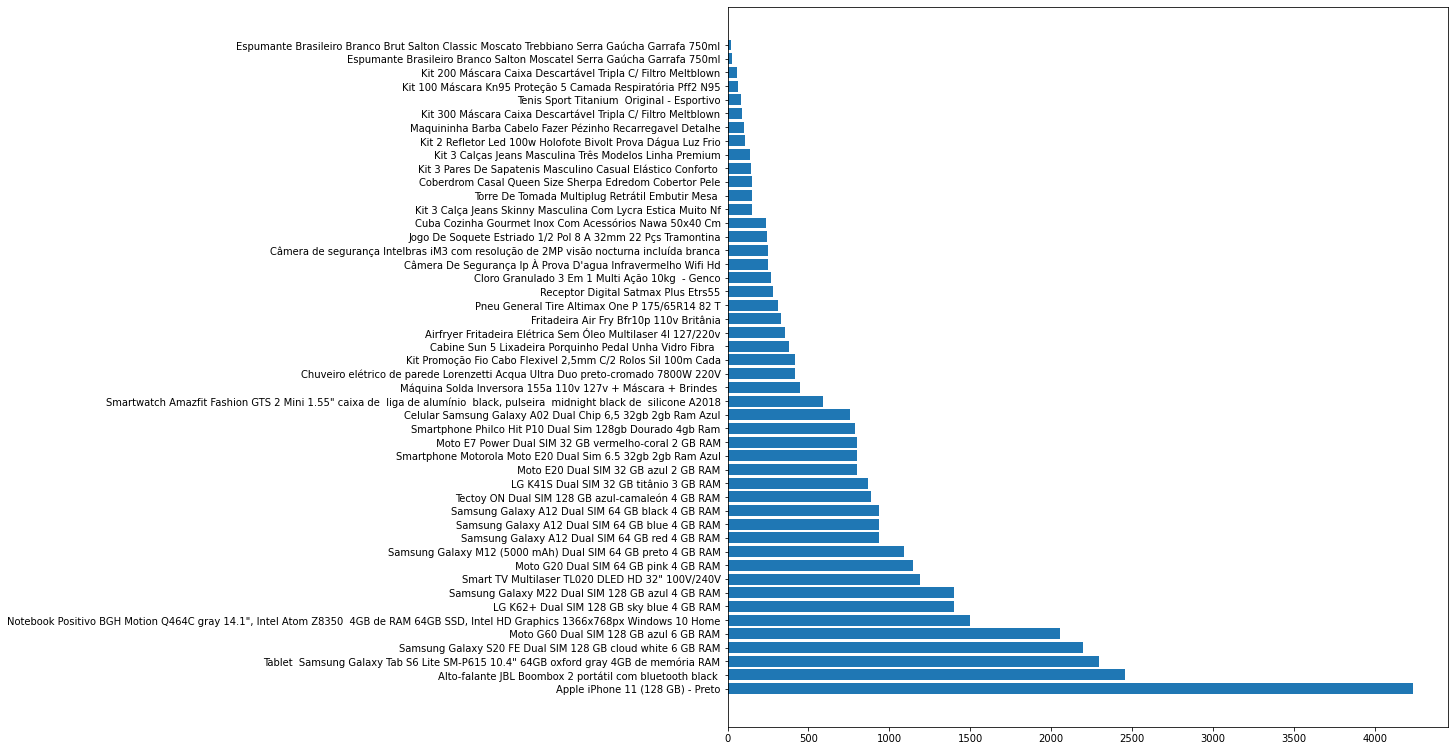

In [144]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0,0,1,1])
brand = ofertas['Produtos']
year2020 = ofertas['Preços']

ax.barh(brand, year2020, align='center')

plt.show()